In [1]:
import pandas as pd
import numpy as np
import polars as pl
import polars.selectors as cs
import random
seed = 42
random.seed(seed)

In [2]:
df = pl.read_parquet("leads.parquet")

In [3]:
df.describe()

statistic,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
str,str,f64,str,str,str,str,f64,f64,f64,f64,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,f64,f64,str,str,str
"""count""","""9240""",9240.0,"""9240""","""9204""","""9240""","""9240""",9240.0,9103.0,9240.0,9103.0,"""9137""","""6779""","""7802""","""7033""","""6550""","""6531""","""9240""","""9240""","""9240""","""9240""","""9240""","""9240""","""9240""","""9240""","""5887""","""4473""","""9240""","""9240""","""6531""","""7820""","""5022""","""5022""",5022.0,5022.0,"""9240""","""9240""","""9240"""
"""null_count""","""0""",0.0,"""0""","""36""","""0""","""0""",0.0,137.0,0.0,137.0,"""103""","""2461""","""1438""","""2207""","""2690""","""2709""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""3353""","""4767""","""0""","""0""","""2709""","""1420""","""4218""","""4218""",4218.0,4218.0,"""0""","""0""","""0"""
"""mean""",null,617188.435606,null,null,null,null,0.38539,3.445238,487.698268,2.36282,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,14.306252,16.344883,null,null,null
"""std""",null,23405.995698,null,null,null,null,0.486714,4.854853,548.021466,2.161418,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,1.386694,1.811395,null,null,null
"""min""","""000104b9-23e4-4ddc-8caa-8629fe…",579533.0,"""API""","""Click2call""","""No""","""No""",0.0,0.0,0.0,0.0,"""Approached upfront""","""Asia/Pacific Region""","""Banking, Investment And Insura…","""Advertisements""","""Businessman""","""Better Career Prospects""","""No""","""No""","""No""","""No""","""No""","""No""","""No""","""No""","""Already a student""","""High in Relevance""","""No""","""No""","""Dual Specialization Student""","""Mumbai""","""01.High""","""01.High""",7.0,11.0,"""No""","""No""","""Approached upfront"""
"""25%""",null,596485.0,null,null,null,null,0.0,1.0,12.0,1.0,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,14.0,15.0,null,null,null
"""50%""",null,615481.0,null,null,null,null,0.0,3.0,248.0,2.0,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,14.0,16.0,null,null,null
"""75%""",null,637387.0,null,null,null,null,1.0,5.0,936.0,3.0,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,15.0,18.0,null,null,null
"""max""","""fffb0e5e-9f92-4017-9f42-781a69…",660737.0,"""Quick Add Form""","""youtubechannel""","""Yes""","""Yes""",1.0,251.0,2272.0,55.0,"""Visited Booth in Tradeshow""","""unknown""","""Travel and Tourism""","""Word Of Mouth""","""Working Professional""","""Other""","""Yes""","""No""","""Yes""","""Yes""","""Yes""","""Yes""","""Yes""","""No""","""wrong number given""","""Worst""","""No""","""No""","""Student of SomeSchool""","""Tier II Cities""","""03.Low""","""03.Low""",18.0,20.0,"""No""","""Yes""","""View in browser link Clicked"""


In [4]:
df.null_count().sum() / df.shape[0]

Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
0.0,0.0,0.0,0.003896,0.0,0.0,0.0,0.014827,0.0,0.014827,0.011147,0.266342,0.155628,0.238853,0.291126,0.293182,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.362879,0.515909,0.0,0.0,0.293182,0.15368,0.456494,0.456494,0.456494,0.456494,0.0,0.0,0.0


In [5]:
# Listing out the columns that having null value
df.null_count().sum().columns

['Prospect ID',
 'Lead Number',
 'Lead Origin',
 'Lead Source',
 'Do Not Email',
 'Do Not Call',
 'Converted',
 'TotalVisits',
 'Total Time Spent on Website',
 'Page Views Per Visit',
 'Last Activity',
 'Country',
 'Specialization',
 'How did you hear about X Education',
 'What is your current occupation',
 'What matters most to you in choosing a course',
 'Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Tags',
 'Lead Quality',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'Lead Profile',
 'City',
 'Asymmetrique Activity Index',
 'Asymmetrique Profile Index',
 'Asymmetrique Activity Score',
 'Asymmetrique Profile Score',
 'I agree to pay the amount through cheque',
 'A free copy of Mastering The Interview',
 'Last Notable Activity']

In [6]:
df.shape[0]

9240

### Columns selection

In [7]:
df_pandas = df.to_pandas()
all_cats_columns = df.select(cs.string()).columns
binary_cols = []
cate_cols = []
for c in all_cats_columns:
    if len(df_pandas[c].unique().tolist()) == 2:
        binary_cols.append(c)
    else:
        cate_cols.append(c)
print(f"binary_cols ({len(binary_cols)}): {binary_cols}")
print(f"cate_cols ({len(cate_cols)}): {cate_cols}")
target = "Converted"
num_columns = df.select(cs.integer() | cs.float()).columns
print(f"num_columns ({len(num_columns)}): {num_columns}")
print(f"Target columns: {target}")
print(f"Total columns: {len(df.columns)}")

binary_cols (9): ['Do Not Email', 'Do Not Call', 'Search', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations', 'A free copy of Mastering The Interview']
cate_cols (21): ['Prospect ID', 'Lead Origin', 'Lead Source', 'Last Activity', 'Country', 'Specialization', 'How did you hear about X Education', 'What is your current occupation', 'What matters most to you in choosing a course', 'Magazine', 'Receive More Updates About Our Courses', 'Tags', 'Lead Quality', 'Update me on Supply Chain Content', 'Get updates on DM Content', 'Lead Profile', 'City', 'Asymmetrique Activity Index', 'Asymmetrique Profile Index', 'I agree to pay the amount through cheque', 'Last Notable Activity']
num_columns (7): ['Lead Number', 'Converted', 'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit', 'Asymmetrique Activity Score', 'Asymmetrique Profile Score']
Target columns: Converted
Total columns: 37


In [8]:
all_cats_columns

['Prospect ID',
 'Lead Origin',
 'Lead Source',
 'Do Not Email',
 'Do Not Call',
 'Last Activity',
 'Country',
 'Specialization',
 'How did you hear about X Education',
 'What is your current occupation',
 'What matters most to you in choosing a course',
 'Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Tags',
 'Lead Quality',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'Lead Profile',
 'City',
 'Asymmetrique Activity Index',
 'Asymmetrique Profile Index',
 'I agree to pay the amount through cheque',
 'A free copy of Mastering The Interview',
 'Last Notable Activity']

In [9]:
len(all_cats_columns)

30

## Visualising Numeric Variables

Let's make a pairplot of all the numeric variables

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

df_viz = df.to_pandas()

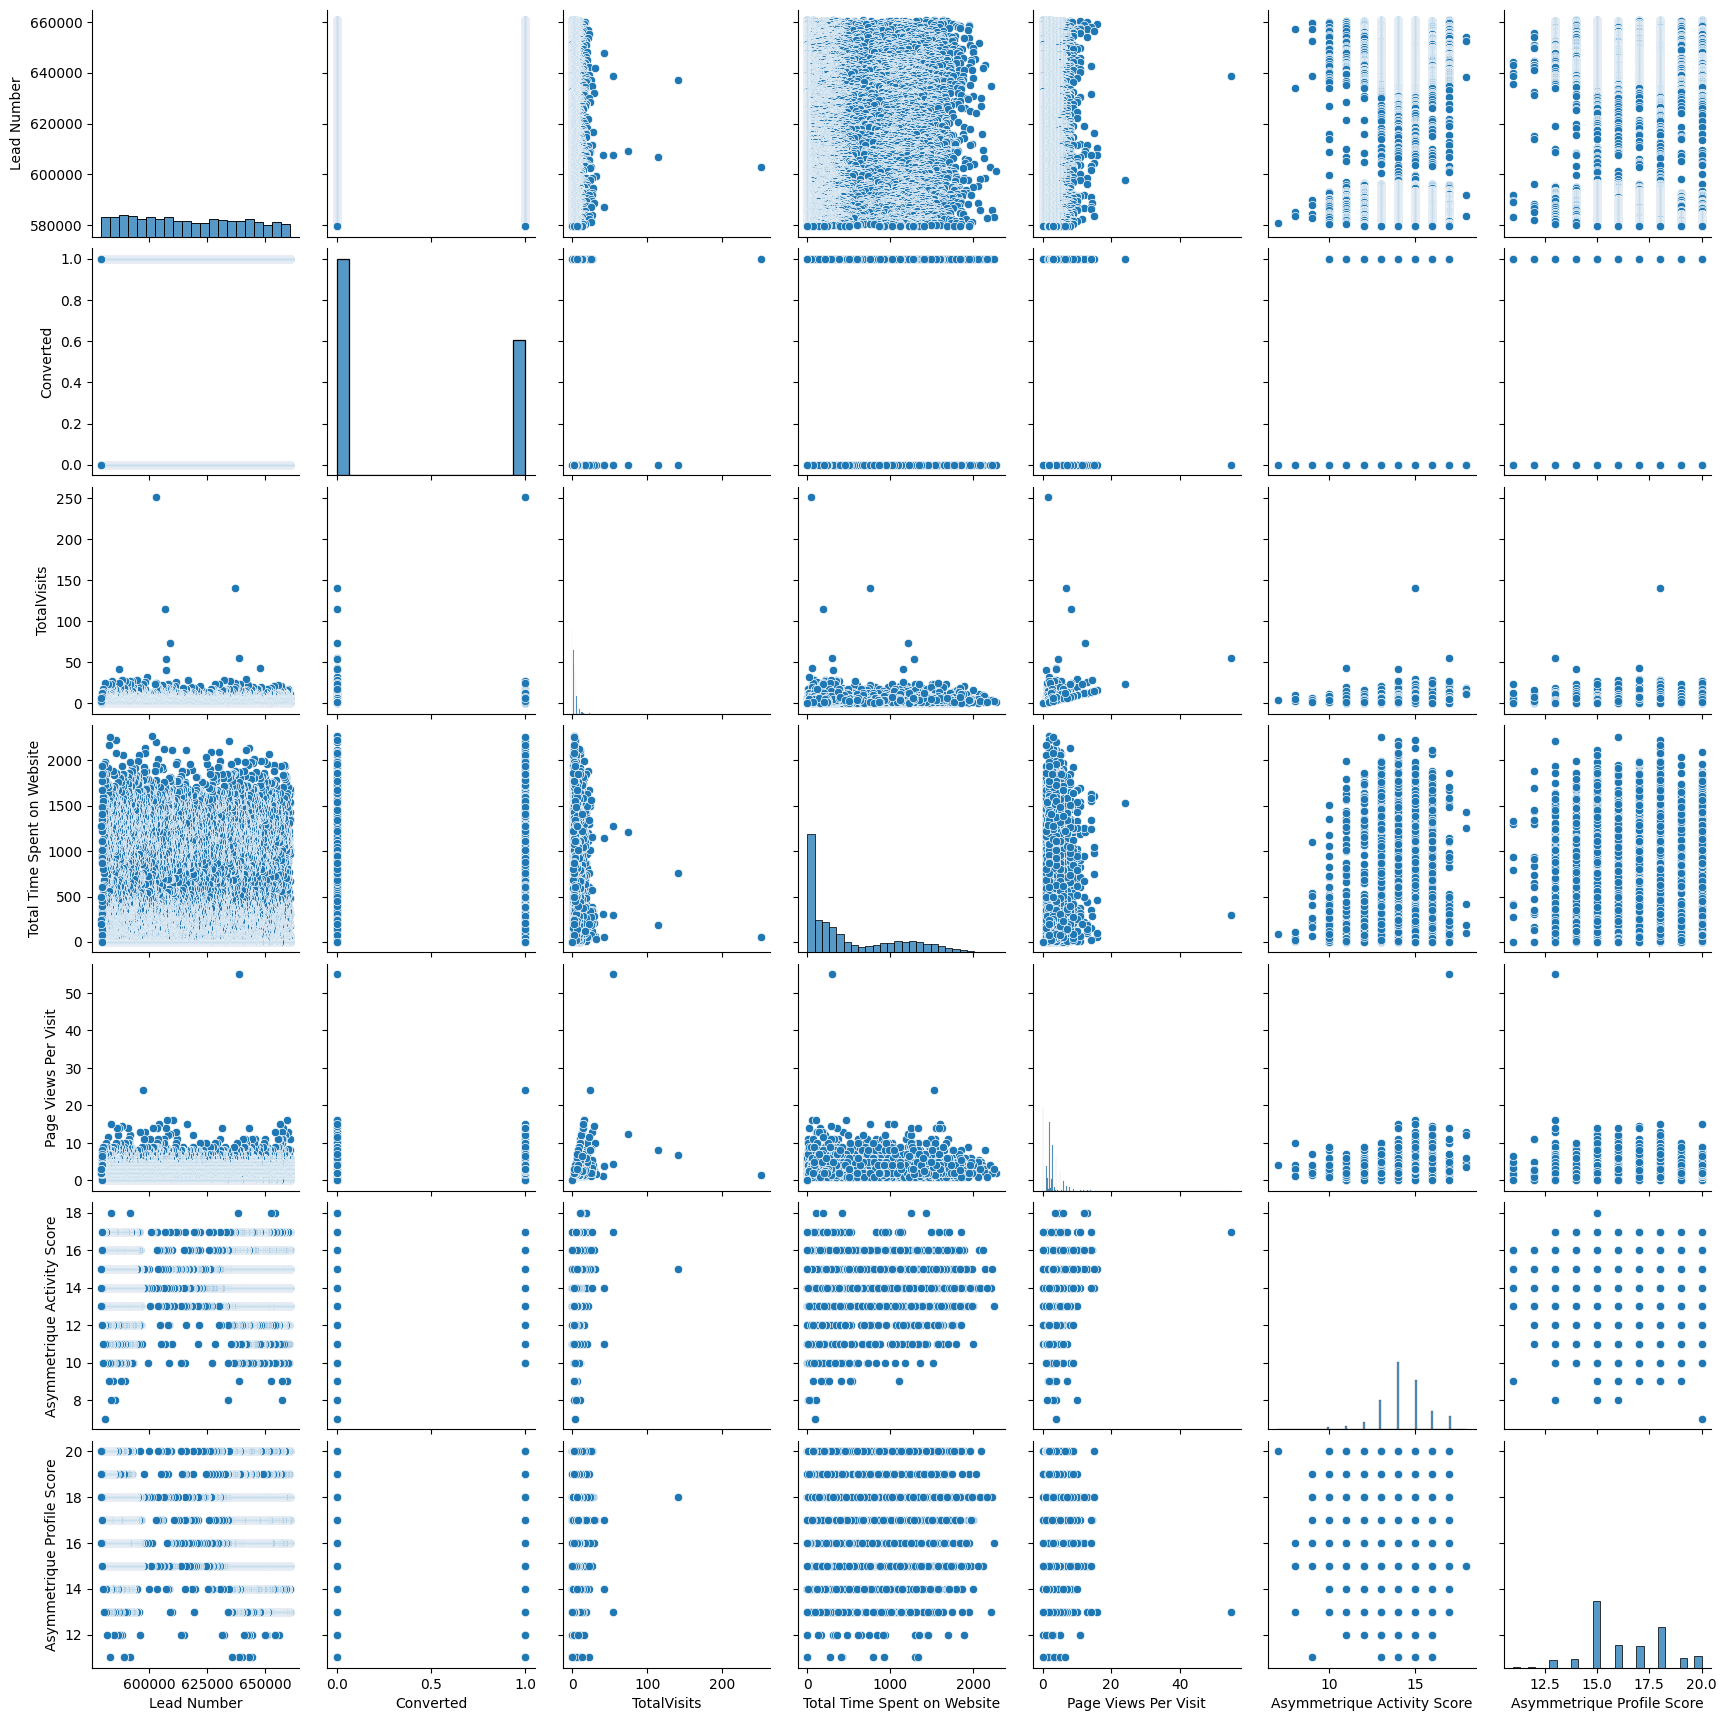

In [11]:
sns.pairplot(df_viz[num_columns])
plt.show()

## Visualising Categorical Variables

As you might have noticed, there are a few categorical variables as well. Let's make a boxplot for some of these variables.

## Cat Plot

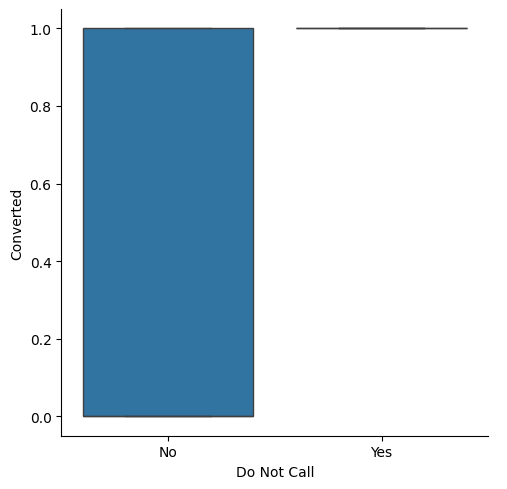

In [12]:
import seaborn as sns

# this prove the point that most of leads dont want to called.
sns.catplot(data=df_viz, x="Do Not Call", y="Converted", kind="box")

In [13]:
# As tags are the most importance feature in prediction. we should consider the category with the most converted time counted.
df_viz.groupby("Tags")["Converted"].apply(
    lambda x: x.value_counts().sort_values(ascending=False)
)

Tags                                                
Already a student                                  0     462
                                                   1       3
Busy                                               1     105
                                                   0      81
Closed by Horizzon                                 1     356
                                                   0       2
Diploma holder (Not Eligible)                      0      62
                                                   1       1
Graduation in progress                             0     104
                                                   1       7
In confusion whether part time or DLP              0       4
                                                   1       1
Interested  in full time MBA                       0     114
                                                   1       3
Interested in Next batch                           1       5
Interested in other courses     

In [14]:
# We analyze other characteristics show that people want to make call and converted also.
df.filter((pl.col("Do Not Call") == "Yes") & (pl.col("Converted") == 1))

Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
str,i64,str,str,str,str,i64,i64,i64,f64,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,i64,i64,str,str,str
"""65ce5db8-628d-4678-891a-dfdd85…",654027,"""API""","""Google""","""No""","""Yes""",1,9,1482,3.0,"""Email Opened""","""India""","""Marketing Management""","""Multiple Sources""","""Unemployed""","""Better Career Prospects""","""No""","""No""","""No""","""No""","""No""","""No""","""No""","""No""","""Will revert after reading the …","""Not Sure""","""No""","""No""","""Select""","""Mumbai""","""02.Medium""","""02.Medium""",15,16,"""No""","""No""","""Modified"""
"""2e26f4ce-5221-4e53-82b9-1bdfc5…",618248,"""Lead Add Form""","""Reference""","""No""","""Yes""",1,0,0,0.0,"""Olark Chat Conversation""",null,"""Healthcare Management""","""Select""","""Unemployed""","""Better Career Prospects""","""No""","""No""","""No""","""No""","""No""","""No""","""No""","""No""","""Closed by Horizzon""","""Might be""","""No""","""No""","""Potential Lead""","""Mumbai""","""01.High""","""01.High""",16,17,"""No""","""No""","""Modified"""


In [15]:
from scipy.stats import chi2_contingency
import math


def cramers_v(x, y):
    # Create a contingency table
    contingency_table = pd.crosstab(x, y)

    # Calculate Chi-Square statistic
    chi2, p, dof, expected = chi2_contingency(contingency_table)

    # Calculate Cramér's V
    n = contingency_table.sum().sum()
    min_dim = min(contingency_table.shape) - 1
    v = np.sqrt(chi2 / (n * min_dim))
    if math.isnan(v):
        return 0
    else:
        return v

In [16]:
# Show the correlation between categorical columns and target using Chi-Square statistic
corr_list = [{c: cramers_v(df_viz[c], df_viz[target])} for c in all_cats_columns]
sorted_corr = sorted(corr_list, key=lambda x: list(x.values())[0], reverse=True)
new_cats_columns = [list(c.keys())[0] for c in sorted_corr if list(c.values())[0] > 0]

/var/folders/fm/py2dzvyj2670fl204kv6jt8r0000gp/T/ipykernel_85394/2073914844.py:15: RuntimeWarning: invalid value encountered in divide
  v = np.sqrt(chi2 / (n * min_dim))
/var/folders/fm/py2dzvyj2670fl204kv6jt8r0000gp/T/ipykernel_85394/2073914844.py:15: RuntimeWarning: invalid value encountered in divide
  v = np.sqrt(chi2 / (n * min_dim))
/var/folders/fm/py2dzvyj2670fl204kv6jt8r0000gp/T/ipykernel_85394/2073914844.py:15: RuntimeWarning: invalid value encountered in divide
  v = np.sqrt(chi2 / (n * min_dim))
/var/folders/fm/py2dzvyj2670fl204kv6jt8r0000gp/T/ipykernel_85394/2073914844.py:15: RuntimeWarning: invalid value encountered in divide
  v = np.sqrt(chi2 / (n * min_dim))
/var/folders/fm/py2dzvyj2670fl204kv6jt8r0000gp/T/ipykernel_85394/2073914844.py:15: RuntimeWarning: invalid value encountered in divide
  v = np.sqrt(chi2 / (n * min_dim))


In [17]:
sorted_corr

[{'Prospect ID': 1.0},
 {'Tags': 0.9335340637666211},
 {'Lead Quality': 0.6599449125917178},
 {'Last Activity': 0.3979550112712201},
 {'Last Notable Activity': 0.38246336222699445},
 {'Lead Profile': 0.37991379132935266},
 {'Lead Source': 0.339497340985687},
 {'Lead Origin': 0.32612870627821144},
 {'What is your current occupation': 0.30347951682415963},
 {'Asymmetrique Activity Index': 0.1913047460235737},
 {'Asymmetrique Profile Index': 0.17439475388922093},
 {'Do Not Email': 0.13516917720625762},
 {'Specialization': 0.07901694318285318},
 {'City': 0.0771589331390982},
 {'Country': 0.07417754161000441},
 {'How did you hear about X Education': 0.06227405300899766},
 {'A free copy of Mastering The Interview': 0.039580156305289556},
 {'Through Recommendations': 0.014566329276208307},
 {'What matters most to you in choosing a course': 0.012102277793609997},
 {'Do Not Call': 0.011023134554334001},
 {'Digital Advertisement': 0.0004442601361869393},
 {'Search': 0.0},
 {'Magazine': 0},
 {'Ne

In [18]:
new_cats_columns

['Prospect ID',
 'Tags',
 'Lead Quality',
 'Last Activity',
 'Last Notable Activity',
 'Lead Profile',
 'Lead Source',
 'Lead Origin',
 'What is your current occupation',
 'Asymmetrique Activity Index',
 'Asymmetrique Profile Index',
 'Do Not Email',
 'Specialization',
 'City',
 'Country',
 'How did you hear about X Education',
 'A free copy of Mastering The Interview',
 'Through Recommendations',
 'What matters most to you in choosing a course',
 'Do Not Call',
 'Digital Advertisement']

In [19]:
# filter out columns that having zero-related to the target (0 or 0.0)
binary_cols = [c for c in binary_cols if c in new_cats_columns]
cate_cols = [c for c in cate_cols if c in new_cats_columns]
print(f"binary_cols: {binary_cols}")
print(f"cate_cols: {cate_cols}")

binary_cols: ['Do Not Email', 'Do Not Call', 'Digital Advertisement', 'Through Recommendations', 'A free copy of Mastering The Interview']
cate_cols: ['Prospect ID', 'Lead Origin', 'Lead Source', 'Last Activity', 'Country', 'Specialization', 'How did you hear about X Education', 'What is your current occupation', 'What matters most to you in choosing a course', 'Tags', 'Lead Quality', 'Lead Profile', 'City', 'Asymmetrique Activity Index', 'Asymmetrique Profile Index', 'Last Notable Activity']


In [20]:
# Spearman correlation between features and target
spearman_corr = df_viz[num_columns].corr()
print("\nSpearman Correlation:")
print(spearman_corr[target])


Spearman Correlation:
Lead Number                    0.025157
Converted                      1.000000
TotalVisits                    0.030395
Total Time Spent on Website    0.362483
Page Views Per Visit          -0.003328
Asymmetrique Activity Score    0.167962
Asymmetrique Profile Score     0.218571
Name: Converted, dtype: float64


## Data Preprocessing

In [21]:
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.preprocessing import (
    MinMaxScaler,
    OrdinalEncoder,
    LabelBinarizer,
    OneHotEncoder,
    StandardScaler,
    TargetEncoder,
)

from sklearn.impute import SimpleImputer
import xgboost as xgb
from sklearn.model_selection import train_test_split

In [22]:
# remove target since it will be processed in an other part
num_columns.remove(target)
cate_cols.remove("Prospect ID")

y = df_pandas[target]

### Preprocessing X_train

In [23]:
# handle nominal variables
categorical_pipeline = Pipeline(
    steps=[
        ("cat_imputer", SimpleImputer(strategy="most_frequent")),
        ("target_encoder", TargetEncoder(smooth="auto")),
    ]
)

# Handle binary variables
binary_pipeline = Pipeline(
    steps=[
        ("cat_imputer", SimpleImputer(strategy="most_frequent")),
        ("ordinal_encoder", OrdinalEncoder()),
    ]
)

# Handle numerical variables
numerical_pipeline = Pipeline(
    [
        ("impute", SimpleImputer(strategy="median")),
    ]
)

# Combine the pipelines into a ColumnTransformer
column_transformer = ColumnTransformer(
    transformers=[
        ("num", numerical_pipeline, num_columns),
        ("cat", categorical_pipeline, cate_cols),
        ("binary", binary_pipeline, binary_cols),
    ],
)

# Transform all values and standardize the values
data_preprocessing_pipeline = Pipeline(
    steps=[
        ("column_transformer", column_transformer),
        # In a typical scikit-learn pipeline, the StandardScaler (or any scaling/normalization step) is usually placed after all other preprocessing steps but before any model fitting. The purpose of scaling is to standardize the range of features so that they contribute equally to the model's performance.
        ("standardize", StandardScaler()),
    ]
)

In [24]:
X = data_preprocessing_pipeline.fit_transform(df_pandas.drop(columns=target, axis=1), y)
X = pd.DataFrame(X, columns=data_preprocessing_pipeline.get_feature_names_out())
X.head()

,num__Lead Number,num__TotalVisits,num__Total Time Spent on Website,num__Page Views Per Visit,num__Asymmetrique Activity Score,num__Asymmetrique Profile Score,cat__Lead Origin,cat__Lead Source,cat__Last Activity,cat__Country,...,cat__Lead Profile,cat__City,cat__Asymmetrique Activity Index,cat__Asymmetrique Profile Index,cat__Last Notable Activity,binary__Do Not Email,binary__Do Not Call,binary__Digital Advertisement,binary__Through Recommendations,binary__A free copy of Mastering The Interview
0,1.860674,-0.713593,-0.889974,-1.098699,0.806509,-0.882017,-0.469611,-0.770435,-0.761495,1.229886,...,0.119865,0.941463,0.580650,-1.276537,-0.851734,-0.293755,-0.014714,-0.020811,-0.027535,-0.674285
1,1.860289,0.324018,0.339972,0.066441,0.806509,-0.882017,-0.466251,-0.038622,-0.102185,-0.308661,...,0.067919,0.820426,0.601954,-1.270597,-0.076812,-0.293755,-0.014714,-0.020811,-0.027535,-0.674285
2,1.860246,-0.298549,1.905689,-0.166587,-0.161050,2.831907,-0.156901,-0.417128,-0.131302,-0.408185,...,1.776438,0.122903,0.580650,1.457382,-0.104824,-0.293755,-0.014714,-0.020811,-0.027535,1.483053
3,1.859905,-0.506071,-0.333396,-0.632643,-1.128609,0.603553,-0.148204,-0.373697,-0.331549,-0.336747,...,0.109450,0.203177,0.499927,1.487479,-0.833691,-0.293755,-0.014714,-0.020811,-0.027535,-0.674285
4,1.858281,-0.298549,1.715905,-0.632643,0.806509,1.346338,-0.138273,0.101219,-1.335640,-0.308661,...,0.067919,0.145864,0.601954,1.374490,-0.853886,-0.293755,-0.014714,-0.020811,-0.027535,-0.674285


## Split data

In [25]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=seed, shuffle=True, stratify=y
)

## Perform tuning hyper params with CV

In [26]:
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")
# Define the hyperparameter search space
param_grid = {
    "C": [0.01, 0.1, 1, 10, 100],  # Regularization strength
    "penalty": ["l1", "l2"],  # Type of regularization
    "multi_class": ["auto", "ovr", "multinomial"],
    "solver": ["lbfgs", "liblinear", "newton-cg", "newton-cholesky", "sag", "saga"],
}
log_reg = LogisticRegression()

# Perform Grid Search with 5-fold cross-validation
grid_search = GridSearchCV(log_reg, param_grid, cv=5, scoring="accuracy", verbose=1)

# Fit the model
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print(f"Best Hyperparameters: {best_params}")

Fitting 5 folds for each of 180 candidates, totalling 900 fits
Best Hyperparameters: {'C': 1, 'multi_class': 'auto', 'penalty': 'l2', 'solver': 'saga'}


## Model Evaluation

In [27]:
# Evaluate the best model on the test set
best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

f1_scores = f1_score(y_test, y_pred)
roc_auc_scores = roc_auc_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy:.4f}")
print(f"ROC AUC: {roc_auc_scores:.4f}")
print(f"F1 score: {f1_scores:.4f}")

Test Accuracy: 0.9264
ROC AUC: 0.9179
F1 score: 0.9022


## Train Random forest to retrive the feature importance

In [28]:
from sklearn.ensemble import RandomForestClassifier

# Train a Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=seed)
rf_model.fit(X_train, y_train)

# Get feature importance
feature_importances = rf_model.feature_importances_

# Combine with feature names
importance_df = pd.DataFrame({"Feature": X.columns, "Importance": feature_importances})

# Sort features by importance
importance_df = importance_df.sort_values(by="Importance", ascending=False)

print(importance_df)

                                              Feature  Importance
14                                          cat__Tags    0.370705
15                                  cat__Lead Quality    0.121620
2                    num__Total Time Spent on Website    0.089516
20                         cat__Last Notable Activity    0.063442
16                                  cat__Lead Profile    0.047112
0                                    num__Lead Number    0.043462
8                                  cat__Last Activity    0.040698
6                                    cat__Lead Origin    0.030393
7                                    cat__Lead Source    0.026861
12               cat__What is your current occupation    0.022877
4                    num__Asymmetrique Activity Score    0.022526
17                                          cat__City    0.014758
10                                cat__Specialization    0.014574
3                           num__Page Views Per Visit    0.013965
1         